<a href="https://colab.research.google.com/github/MaciejAutuch/Projects_From_Jet_Brain/blob/master/Solved_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [147]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [148]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [149]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [150]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [151]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [152]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [153]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [154]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [155]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [156]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

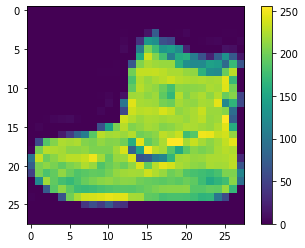

In [157]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [158]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

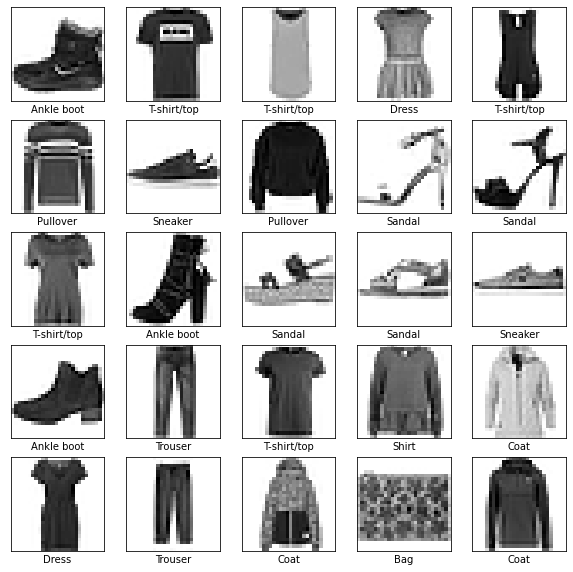

In [159]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [160]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [161]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [162]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4970 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2986 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2478 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [163]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3400 - accuracy: 0.8785 - 577ms/epoch - 2ms/step

Test accuracy: 0.8784999847412109


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [164]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [165]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [166]:
predictions[0]

array([3.5866697e-06, 3.7761136e-09, 3.3867883e-07, 1.2000206e-09,
       1.1136068e-07, 6.2383566e-04, 2.3911289e-08, 1.6386690e-02,
       6.0735005e-07, 9.8298484e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [167]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [168]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [169]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

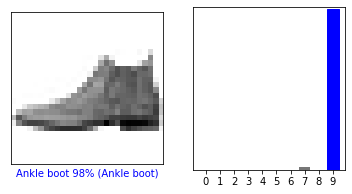

In [170]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

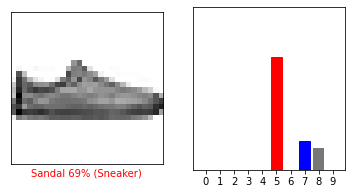

In [171]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

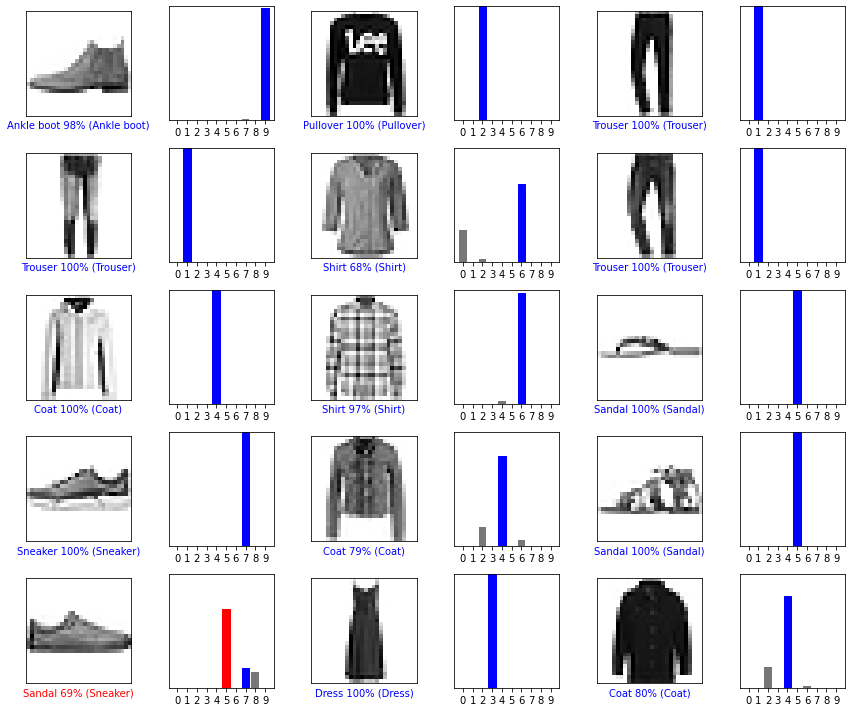

In [172]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [173]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [174]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [175]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.9258706e-05 3.6378896e-14 9.9943799e-01 2.1582863e-07 1.4064579e-04
  1.8594813e-10 3.9183497e-04 7.9572790e-16 6.9566221e-11 4.1933853e-15]]


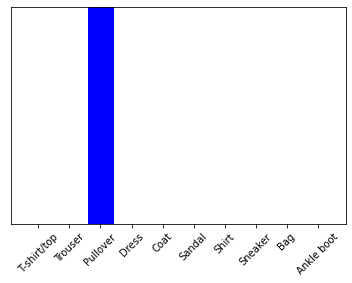

In [176]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [177]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

<h2>Question 1</h2>

Instead of the MNIST fashion data, load the original MNIST digit data. Train the model and print accuracy and loss for this dataset.

In [178]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




In [179]:
train_images.shape

(60000, 28, 28)

In [180]:
len(train_labels)

60000

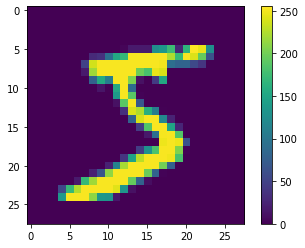

In [181]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [182]:
train_images = train_images / 255.0
test_images = test_images / 255.0

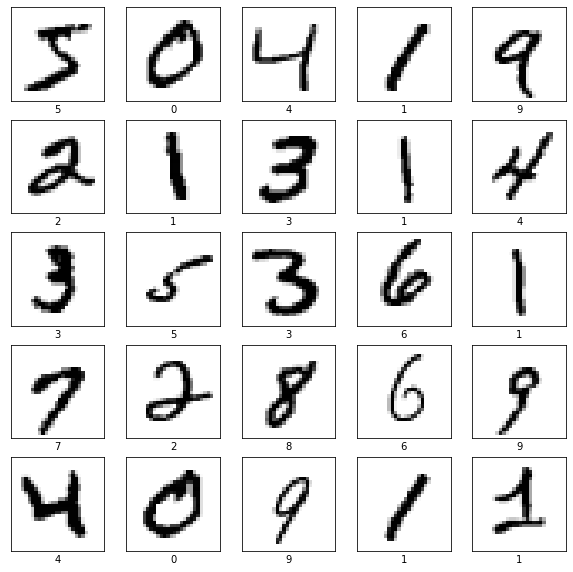

In [183]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [184]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [185]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [186]:
model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2557 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1081 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

In [187]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0840 - accuracy: 0.9785 - 528ms/epoch - 2ms/step

Test accuracy: 0.9785000085830688


<h2>Question 2</h2>

Before we proceed, we reload the fashion_mnist data, and scale it as before, and rebuild the model.


In [188]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4976 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2925 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

Use the following code to read this image file ("boot"). You need to first make the file accessible on drive, or upload it interactively, as shown below. Assign the image to a variable, Img. Print the type of Img. 


In [189]:
from PIL import Image
from google.colab import drive 
from google.colab import drive 
drive.mount('/content/gdrive')

## You can also use files.upload() by uncommenting the code below
## This allows you to interactively upload files
#from google.colab import files
#uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [190]:
Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png')
img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png')

print(img.format)
print(img.mode)

PNG
RGBA


<h2>Question 3</h2>

We need to perform some transformations on Img. First, we need to resize Img, so that it has the same shape as the data that the model was trained on. You can use the reshape method, with the correct shape. Next, convert the image to an np.array. The values also need to be normalized, by dividing by 255, and finally, the image should be converted to gray scale by removing the 3rd (RGB) dimension.

In [237]:
#Why when I use .convert('LA') I get a 3 dim array and greyscale picture but with .convert('L') I get 2 dim array with colors?

new_img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png').convert('L')
print(new_img.size) # before resize
new_img = new_img.resize((28, 28))
print(new_img.size) # after resize

data = np.asarray(new_img)
print(data.shape)

data = data / 255.0
test_img = Image.fromarray((data * 255).astype(np.uint8))



(438, 430)
(28, 28)
(28, 28)


<h2>Question 4</h2>

Use plt.imshow to display the above transformed image. Display it both before and after the transformations you did in the previous question.

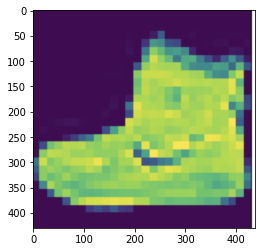

In [233]:
plt.imshow(img)

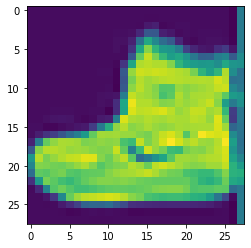

In [232]:
plt.imshow(test_img)

<h2>Question 5</h2>

Now test the model to see whether it correctly classifies Img. What classification does it give? 

In [238]:
data = (np.expand_dims(data,0))

print(data.shape)
prediction = probability_model.predict(data)
print(prediction)


(1, 28, 28)
[[6.0864063e-06 2.7318732e-08 1.5874335e-07 2.9019623e-07 8.4158216e-08
  1.6596062e-04 1.1027145e-07 5.0109387e-03 2.6966754e-04 9.9454665e-01]]


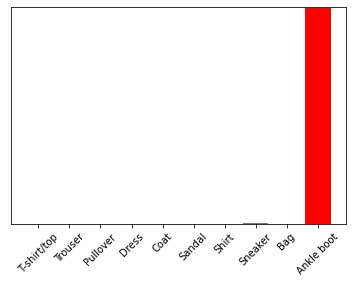

In [239]:
plot_value_array(1, prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

<h2>Question 6</h2>
Try classifying 3 new image files with the model. You can upload them to the notebook using files.upload, or put them in your Google Drive folder. The images need to be resized to (28,28) and scaled by dividing by 255. 

In [240]:
img_1 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png').convert('L')
img_2 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png').convert('L')
img_3 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/boot.png').convert('L')

img1 = img_1.resize((28, 28))
img2 = img_2.resize((28, 28))
img3 = img_3.resize((28, 28))
print(img1.size) # after resize

data1 = np.asarray(img1)
data2 = np.asarray(img2)
data3 = np.asarray(img3)
print(data1.shape)

data1 = data1 / 255.0
data2 = data2 / 255.0
data3 = data3 / 255.0

(28, 28)
(28, 28)


In [241]:
data1 = (np.expand_dims(data1,0))
data2 = (np.expand_dims(data2,0))
data3 = (np.expand_dims(data3,0))

prediction1 = probability_model.predict(data1)
prediction2 = probability_model.predict(data2)
prediction3 = probability_model.predict(data3)




<h2>Question 7</h2>

Display the images and the labels predicted by the model.

In [ ]:
plot_value_array(1, prediction1[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
plot_value_array(1, prediction2[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
plot_value_array(1, prediction3[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

<h2>Question 8</h2>

The model has a Dense layer with 128 nodes.  Change this to 256, and print the accuracy in training and test.

In [245]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4861 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8665
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3282 - accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2841 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2715 - accuracy: 0.8994
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2582 - accuracy: 0.9043
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2477 - accuracy: 0.9086
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2371 - accuracy: 0.9107
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.227

In [246]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3209 - accuracy: 0.8872 - 672ms/epoch - 2ms/step

Test accuracy: 0.8871999979019165


<h2>Question 9</h2>

Now add a second Dense layer with 64 nodes, and print training and test accuracy.

In [249]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5051 - accuracy: 0.8185
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3679 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3327 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3078 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2919 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2761 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2655 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2552 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2459 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.237

In [250]:
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3287 - accuracy: 0.8801 - 682ms/epoch - 2ms/step

Test accuracy: 0.8801000118255615


<h2>Question 10</h2>

Add a Dropout layer between the 256 node layer and the 64 node layer, with Dropout set to 0.2. Print train and test accuracy. (You can read about Dropout above, under <a href=https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting>Strategies to prevent overfitting</a>.)

In [251]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_4.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5993 - accuracy: 0.7855
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4304 - accuracy: 0.8480
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3850 - accuracy: 0.8624
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3575 - accuracy: 0.8712
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.8785
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8842
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8877
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2895 - accuracy: 0.8968
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.280

In [252]:
test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3597 - accuracy: 0.8704 - 664ms/epoch - 2ms/step

Test accuracy: 0.8704000115394592
